#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 04
**CH04A Management quality and firm size: describing patterns of association**

using the wms-management-survey dataset

version 0.9.0 2025-08-14

In [22]:
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import PercentFormatter

warnings.filterwarnings("ignore")

In [23]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]
# location folders
data_in = dirname + "da_data_repo/wms-management-survey/clean/"
data_out = dirname + "da_case_studies/ch04-management-firm-size/"
output = dirname + "da_case_studies/ch04-management-firm-size/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [24]:
import py_helper_functions as da

sns.set_theme(rc=da.da_theme, palette=da.color)

In [25]:
# Import data
df = pd.read_csv(data_in + "wms_da_textbook.csv")
# df = pd.read_csv("https://osf.io/uzpce/download")



In [26]:
# # Sample selection
# df = df.loc[
#     (df["country"] == "Mexico")
#     & (df["wave"] == 2013)
#     & (df["emp_firm"] >= 100)
#     & (df["emp_firm"] <= 5000)
# ]

In [27]:
df = df.query(
    'country == "Mexico" and wave == 2013 and 100 <= emp_firm <= 5000'
)

In [28]:
df.head()

,firmid,wave,cty,country,sic,management,operations,monitor,target,people,...,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205
10859,7778,2013,mx,Mexico,36.0,3.333333,3.5,3.6,2.8,3.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10861,7780,2013,mx,Mexico,37.0,3.500000,2.5,4.0,3.8,3.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10862,7781,2013,mx,Mexico,30.0,3.888889,4.0,4.8,4.0,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10865,7783,2013,mx,Mexico,22.0,1.833333,1.0,2.4,1.8,1.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10866,7784,2013,mx,Mexico,20.0,2.222222,2.5,2.8,1.8,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df.emp_firm.describe()


count     300.000000
mean      761.140000
std       977.035685
min       100.000000
25%       200.000000
50%       353.000000
75%       900.000000
max      5000.000000
Name: emp_firm, dtype: float64

In [30]:
# Save workfile
df.to_csv(data_out + "ch04-wms-work.csv", index=False)
# Summary
# df.filter(["management", "emp_firm"]).describe()
df[['management', 'emp_firm']].describe()


,management,emp_firm
count,300.000000,300.000000
mean,2.938519,761.140000
std,0.601059,977.035685
min,1.277778,100.000000
25%,2.555556,200.000000
50%,2.944444,353.000000
75%,3.277778,900.000000
max,4.611111,5000.000000


### Figure 4.1 Distribution of the management score variable

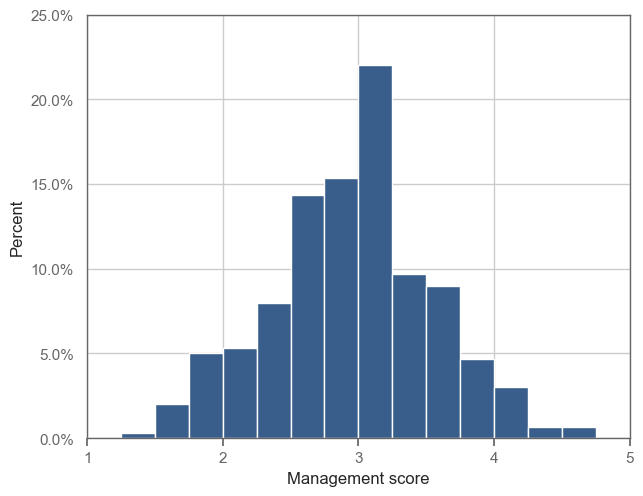

In [31]:

sns.histplot(
    data=df,
    x="management",
    binwidth=0.25,  
    binrange=(1,5),  # Set the range of the bins from 1 to 5
    color=da.color[0],
    edgecolor="white",
    stat="probability",  # Other options: "count", "frequency", "density", "percent"
    alpha=1, # No transparency (fully opaque)
)

plt.xlabel("Management score") # From matplotlib.pyplot
plt.ylabel("Percent")
plt.ylim(0, 0.25)
plt.yticks(ticks=np.arange(0, 0.26, 0.05))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1)) # Formatting: Sets the y-axis tick labels to display as percentages. `PercentFormatter(1)` means it will multiply the value by 100 and add a percent sign, with 1 decimal place.
plt.xlim(1, 5) # Axis Limits: Sets the x-axis limits from 1 to 5.
plt.xticks(ticks=np.arange(1, 6, 1))
plt.show()

### Figure 4.2 The distribution of employment

(a) Number of employees

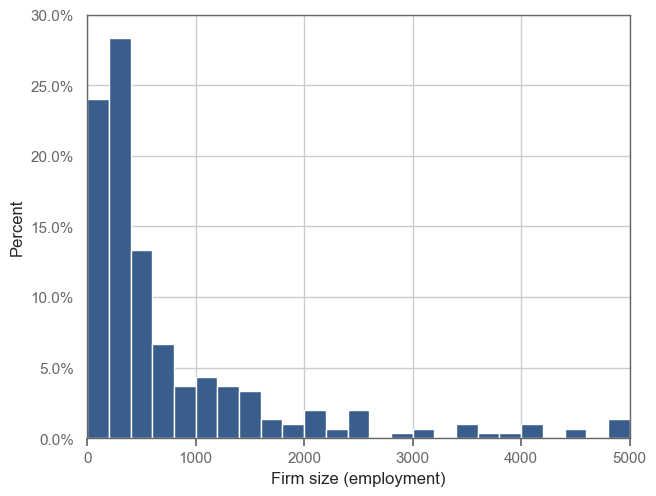

In [32]:
sns.histplot(
    data=df,
    x="emp_firm",
    binwidth=200,  
    binrange=(0,5000),
    color=da.color[0],
    edgecolor="white",
    stat="probability",  
    alpha=1,
)

plt.xlabel("Firm size (employment)")
plt.ylabel("Percent")
plt.ylim(0, 0.3)
plt.yticks(ticks=np.arange(0, 0.31, 0.05))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlim(0, 5000)
plt.xticks(ticks=np.arange(0, 5001, 1000))  
plt.show()

In [33]:
# df["lnemp"] = np.log(df.emp_firm)
df['lnemp'] = np.log(df['emp_firm'])
# df = df.assign(lnemp=np.log(df['emp_firm']))
df["lnemp"].describe()


count    300.000000
mean       6.081850
std        0.992700
min        4.605170
25%        5.298317
50%        5.866432
75%        6.802395
max        8.517193
Name: lnemp, dtype: float64

(b) Natural log of number of employees

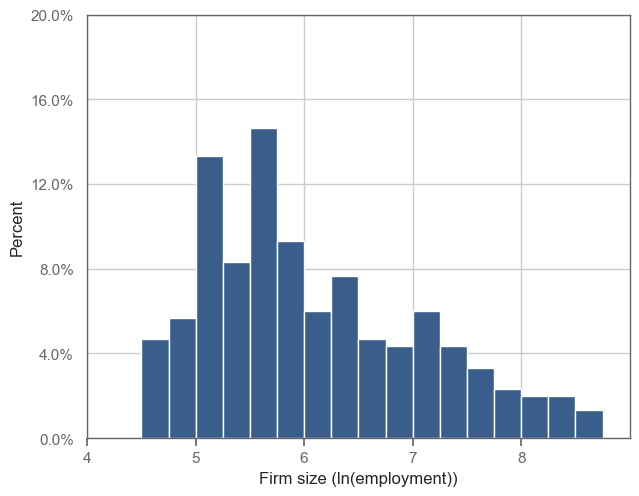

In [34]:
sns.histplot(
    data=df,
    x="lnemp",
    binwidth=0.25,  
    binrange=(4,9),
    color=da.color[0],
    edgecolor="white",
    stat="probability",  
    alpha=1,
)

plt.xlabel("Firm size (ln(employment))")
plt.ylabel("Percent")
plt.ylim(0, 0.2)
plt.yticks(ticks=np.arange(0, 0.21, 0.04))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlim(4, 9)
plt.xticks(ticks=np.arange(4, 9, 1))  
plt.show()

In [ ]:
# df['emp3bins'] = np.where(df['emp_firm'] < 200, 1, np.nan)
# df['emp3bins'] = np.where(
#     (df['emp_firm'] >= 200) & (df['emp_firm'] < 1000), 2, df['emp3bins']
# )
# df['emp3bins'] = np.where(df['emp_firm'] >= 1000, 3, df['emp3bins'])
# df['emp3bins'].head()


10859    2.0
10861    3.0
10862    2.0
10865    2.0
10866    2.0
Name: emp3bins, dtype: float64

In [64]:
# Create the bins with infinite edges to catch everything
# right=False ensures 200 goes into the [200, 1000) bin, matching the original logic
df['emp3bins'] = pd.cut(df['emp_firm'], 
                        bins=[0, 200, 1000, np.inf], # Define the bin edges: [0, 200), [200, 1000), [1000, inf) In NumPy (and by extension, pandas), np.inf stands for Positive Infinity.
                        labels=[1, 2, 3], 
                        right=False) # right=False means the bins include the left edge but not the right edge
df['emp3bins'].head(10)


10859    2
10861    3
10862    2
10865    2
10866    2
10867    1
10869    2
10871    2
10873    3
10874    3
Name: emp3bins, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [67]:
df.emp3bins.value_counts()


emp3bins
2    156
1     72
3     72
Name: count, dtype: int64

In [63]:
df["emp3bins"].describe()


count     300
unique      3
top         2
freq      156
Name: emp3bins, dtype: int64

### Figure 4.3 Quality of specific management practices by three bins of firm size: conditional probabilities

(a) Lean management

In [73]:
df[["emp3bins", "lean1"]]


,emp3bins,lean1
10859,2,3.0
10861,3,3.0
10862,2,4.0
10865,2,1.0
10866,2,2.0
...,...,...
11375,2,3.0
11376,2,2.0
11378,2,3.0
11379,2,4.0


In [ ]:
#Step 1: Building the Frequency Table (The Core)
df1 = (
    df.filter(["emp3bins", "lean1"])
    .groupby(["emp3bins", "lean1"])
    .agg(Count=("emp3bins", "size")) #size here is a function name, not a column name!
    .reset_index()
)
#Step 2: The Denominator (The Broadcast)
df1["Group_count"] = df1.groupby("emp3bins")["Count"].transform("sum")
df1["Percent"] = df1["Count"] / df1["Group_count"]
df1["lean1"] = pd.Categorical(
    df1["lean1"], categories=sorted(set(df1["lean1"]), reverse=True)
)
df1["emp3bins"] = pd.Categorical(
    df1["emp3bins"], categories=sorted(set(df1["emp3bins"]), reverse=True)
)

In [76]:
# Create a Wide-Format table of percentages immediately
cross = pd.crosstab(df['emp3bins'], df['lean1'], normalize='index')

# If you need it back in Long Format (like your df1) for plotting:
df1_compact = (
    pd.crosstab(df['emp3bins'], df['lean1'], normalize='index')
    .stack()
    .reset_index(name='Percent')
)
df1_compact

,emp3bins,lean1,Percent
0,1,1.0,0.194444
1,1,2.0,0.375000
2,1,3.0,0.319444
3,1,4.0,0.111111
4,1,5.0,0.000000
5,2,1.0,0.083333
6,2,2.0,0.288462
7,2,3.0,0.358974
8,2,4.0,0.217949
9,2,5.0,0.051282


In [75]:
df1

,emp3bins,lean1,Count,Group_count,Percent
0,1,1.0,14,72,0.194444
1,1,2.0,27,72,0.375000
2,1,3.0,23,72,0.319444
3,1,4.0,8,72,0.111111
4,1,5.0,0,72,0.000000
5,2,1.0,13,156,0.083333
6,2,2.0,45,156,0.288462
7,2,3.0,56,156,0.358974
8,2,4.0,34,156,0.217949
9,2,5.0,8,156,0.051282


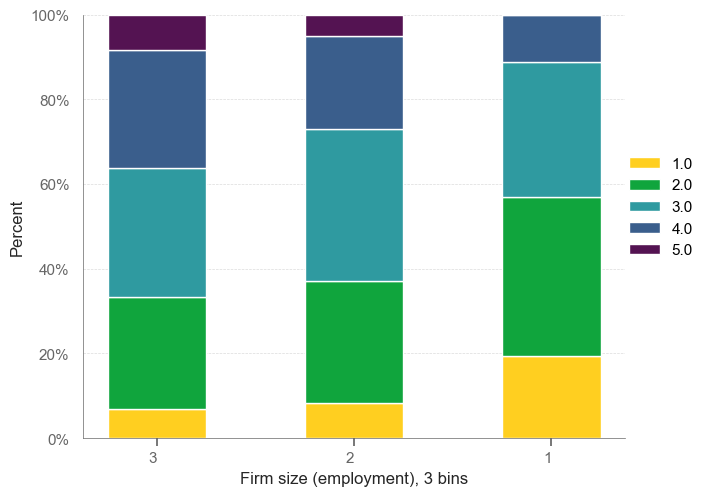

In [77]:

categories = df1_compact["emp3bins"].astype(int).unique().tolist() 
categories.sort(reverse = True)  
subcategories = df1_compact["lean1"].unique()  
color_order = [da.color[3],da.color[1],da.color[4],da.color[0],da.color[2]]
pivot_df = df1_compact.pivot_table(index="emp3bins", columns="lean1", values="Percent", aggfunc="sum").fillna(0)
pivot_df = pivot_df.loc[categories]  

bar_width = 0.5
x = np.arange(len(categories))

fig, ax = plt.subplots()
bottom = np.zeros(len(categories))  
for i, subcat in enumerate(subcategories):
    ax.bar(
        x,
        pivot_df[subcat],
        width=bar_width,
        bottom=bottom,
        label=subcat,
        color=color_order[i],
        alpha=1,
        edgecolor="white",
    )
    bottom += pivot_df[subcat]  


ax.set_xticks(x)
ax.set_xticklabels(categories,  ha="right")
ax.set_xlabel("Firm size (employment), 3 bins")

ax.set_yticks(np.arange(0, 1.1, 0.2))  
ax.set_ylim(0, 1)
ax.set_ylabel("Percent")
ax.yaxis.set_major_formatter(PercentFormatter(1))  

ax.legend(
    title=" ", 
    loc="upper right", 
    bbox_to_anchor=(1.15, 0.75),  
    frameon=False
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(0.5)
ax.spines["bottom"].set_linewidth(0.5)
ax.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)
ax.set_axisbelow(True)
plt.show()

(b) Performance tracking

In [40]:
df1 = (
    df.filter(["emp3bins", "perf2"])
    .groupby(["emp3bins", "perf2"])
    .agg(Count=("emp3bins", "size"))
    .reset_index()
)
df1["Group_count"] = df1.groupby("emp3bins")["Count"].transform("sum")
df1["Percent"] = df1["Count"] / df1["Group_count"]
df1["perf2"] = pd.Categorical(
    df1["perf2"], categories=sorted(set(df1["perf2"]), reverse=True)
)
df1["emp3bins"] = pd.Categorical(
    df1["emp3bins"], categories=sorted(set(df1["emp3bins"]), reverse=True)
)

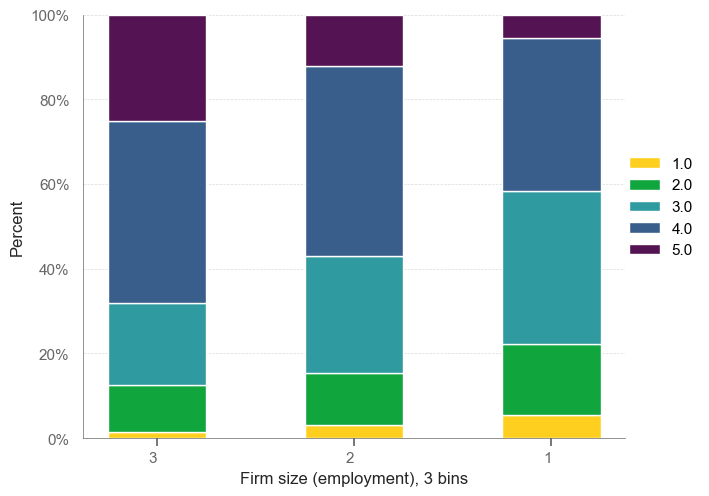

In [41]:

categories = df1["emp3bins"].astype(int).unique().tolist() 
categories.sort(reverse = True)  
subcategories = df1["perf2"].unique()  

color_order = [da.color[3],da.color[1],da.color[4],da.color[0],da.color[2]]

pivot_df = df1.pivot_table(index="emp3bins", columns="perf2", values="Percent", aggfunc="sum").fillna(0)
pivot_df = pivot_df.loc[categories]  

bar_width = 0.5
x = np.arange(len(categories))

fig, ax = plt.subplots()
bottom = np.zeros(len(categories))  
for i, subcat in enumerate(subcategories):
    ax.bar(
        x,
        pivot_df[subcat],
        width=bar_width,
        bottom=bottom,
        label=subcat,
        color=color_order[i],
        alpha=1,
        edgecolor="white",
    )
    bottom += pivot_df[subcat]  


ax.set_xticks(x)
ax.set_xticklabels(categories,  ha="right")
ax.set_xlabel("Firm size (employment), 3 bins")

ax.set_yticks(np.arange(0, 1.1, 0.2))  
ax.set_ylim(0, 1)
ax.set_ylabel("Percent")
ax.yaxis.set_major_formatter(PercentFormatter(1))  

ax.legend(
    title=" ", 
    loc="upper right", 
    bbox_to_anchor=(1.15, 0.75), 
    frameon=False
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(0.5)
ax.spines["bottom"].set_linewidth(0.5)
ax.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)
ax.set_axisbelow(True)
plt.show()

In [42]:
# Bin scatters avg score by employment bins

# Option 1: create 3 bins as defined by thresholds

# Summary

df.groupby("emp3bins")["emp_firm"].agg(["min", "max", "mean", "median", np.std, "size"])

,min,max,mean,median,std,size
emp3bins,,,,,,
1,100.0,197.0,145.597222,150.0,26.397108,72
2,200.0,994.0,413.153846,353.0,190.397552,156
3,1000.0,5000.0,2130.652778,1650.0,1178.115578,72


In [43]:
# Recode employee bins
df["emp3bins"] = df["emp3bins"].replace(1, 150).replace(2, 600).replace(3, 3000)


In [44]:
# Summary
df.groupby("emp3bins")["emp_firm"].agg(["min", "max", "mean", "median", np.std, "size"])

,min,max,mean,median,std,size
emp3bins,,,,,,
150,100.0,197.0,145.597222,150.0,26.397108,72
600,200.0,994.0,413.153846,353.0,190.397552,156
3000,1000.0,5000.0,2130.652778,1650.0,1178.115578,72


In [45]:
# Generate variables by mean
df1 = (
    df.groupby("emp3bins").agg(management_emp3bins=("management", "mean")).reset_index()
)
df1


,emp3bins,management_emp3bins
0,150,2.679784
1,600,2.943732
2,3000,3.185957


### Figure 4.4 Mean management quality score and firm size

(a) Three bins of employment

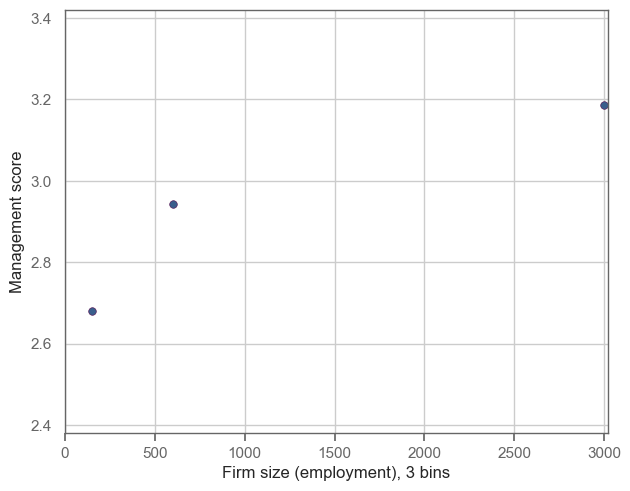

In [46]:
scatter = sns.scatterplot(
    data=df1,
    x="emp3bins",
    y="management_emp3bins",
    s=30,  
    color=da.color[0],
    alpha=1,
    edgecolor=da.color[2]  
)

plt.xlim(0, 3020)
plt.ylim(2.38, 3.42)
plt.xticks(ticks=np.arange(0, 3020, 500))  
plt.yticks(ticks=np.arange(2.4,3.42,0.2))  
plt.xlabel("Firm size (employment), 3 bins")
plt.ylabel("Management score")
plt.show()

In [47]:
df["emp10bins"] = pd.qcut(df["emp_firm"], 10)


In [48]:
# Summary
df_summary = (
    df.filter(["emp_firm", "emp10bins"])
    .groupby("emp10bins")
    .agg(["min", "max", "mean", "median", np.std, "size"])
)
df_summary


emp_firm                                              
                      min     max         mean  median         std size
emp10bins                                                              
(99.999, 144.5]     100.0   140.0   118.566667   118.0   11.595729   30
(144.5, 180.0]      145.0   180.0   163.625000   160.0   12.947007   40
(180.0, 229.4]      184.0   228.0   204.000000   200.0   10.223811   20
(229.4, 278.0]      230.0   275.0   250.533333   250.0   11.607766   30
(278.0, 353.0]      280.0   350.0   310.266667   300.0   23.090427   30
(353.0, 500.0]      356.0   500.0   432.222222   405.0   50.747617   36
(500.0, 670.0]      520.0   670.0   583.240000   600.0   49.321463   25
(670.0, 1110.0]     700.0  1100.0   905.793103   900.0  137.250912   29
(1110.0, 2000.0]   1150.0  2000.0  1515.294118  1500.0  289.735881   34
(2000.0, 5000.0]   2100.0  5000.0  3438.730769  3500.0  982.115006   26

In [49]:
# Recode with bin means
df = df.replace({"emp10bins": df_summary["emp_firm"]["mean"].to_dict()})


In [50]:
df.groupby("emp10bins")["emp_firm"].agg(
    ["min", "max", "mean", "median", np.std, "size"]
)

,min,max,mean,median,std,size
emp10bins,,,,,,
118.566667,100.0,140.0,118.566667,118.0,11.595729,30
163.625000,145.0,180.0,163.625000,160.0,12.947007,40
204.000000,184.0,228.0,204.000000,200.0,10.223811,20
250.533333,230.0,275.0,250.533333,250.0,11.607766,30
310.266667,280.0,350.0,310.266667,300.0,23.090427,30
432.222222,356.0,500.0,432.222222,405.0,50.747617,36
583.240000,520.0,670.0,583.240000,600.0,49.321463,25
905.793103,700.0,1100.0,905.793103,900.0,137.250912,29
1515.294118,1150.0,2000.0,1515.294118,1500.0,289.735881,34


In [51]:
# Generate variables by mean
df1 = (
    df.groupby("emp10bins")
    .agg(management_emp10bins=("management", "mean"))
    .reset_index()
    .assign(emp10bins = lambda x: x["emp10bins"].astype(int))
)
df1


,emp10bins,management_emp10bins
0,118,2.588889
1,163,2.736111
2,204,2.727778
3,250,2.968519
4,310,2.953704
5,432,2.956790
6,583,3.000000
7,905,2.994253
8,1515,3.096405
9,3438,3.410256


(b) Ten bins of employment

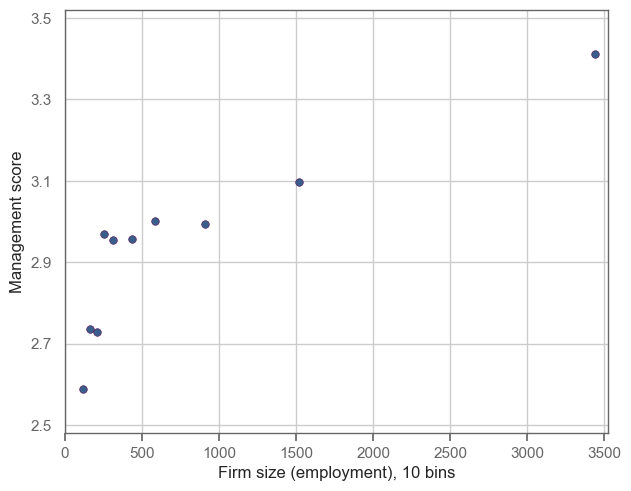

In [52]:
scatter = sns.scatterplot(
    data=df1,
    x="emp10bins",
    y="management_emp10bins",
    s=30,  
    color=da.color[0],
    alpha=1,
    edgecolor=da.color[2]  
)


plt.xlim(0, 3520)
plt.ylim(2.48, 3.52)
plt.xticks(ticks=np.arange(0, 3520, 500))  
plt.yticks(ticks=np.arange(2.5,3.52,0.2))  
plt.xlabel("Firm size (employment), 10 bins")
plt.ylabel("Management score")
plt.show()

### Figure 4.5 The joint distribution of the management quality score and firm size

(a) By employment

In [53]:
scatter = sns.scatterplot(
    data=df,
    x="emp_firm",
    y="management",
    s=20,  
    color=da.color[0],
    alpha=1,
    edgecolor = da.color[0]
)

plt.xlim(-50, 5040)
plt.ylim(0.95, 5.1)
plt.xticks(ticks=np.arange(0, 5040, 1000))  
plt.yticks(ticks=np.arange(1,5.1,1))  
plt.xlabel("Firm size (employment)")
plt.ylabel("Management score")
plt.show()

KeyboardInterrupt: 

(b) By log employment

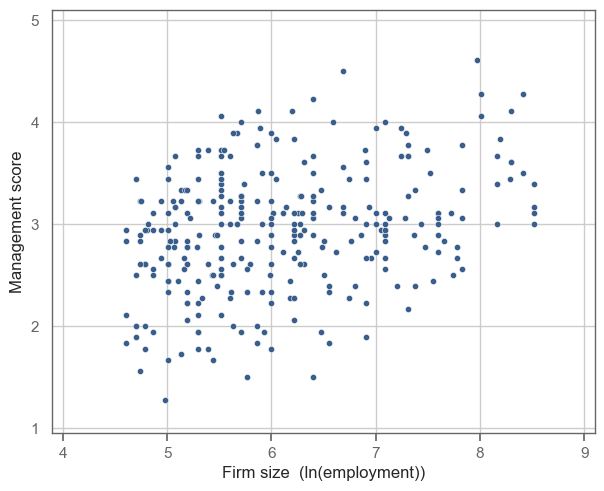

In [ ]:
df["lnemp"] = np.log(df["emp_firm"])

scatter = sns.scatterplot(
    data=df,
    x="lnemp",
    y="management",
    s=20,  
    color=da.color[0],
    alpha=1
)

plt.xlim(3.9, 9.1)
plt.ylim(0.95, 5.1)
plt.xticks(ticks=np.arange(4, 9.1, 1))  
plt.yticks(ticks=np.arange(1,5.1,1))  
plt.xlabel("Firm size  (ln(employment))")
plt.ylabel("Management score")
plt.show()

### Figure 4.6 Conditional summary statistics of the management score by bins of firm size

In [ ]:
df = df.replace({"emp3bins": {150: "Small", 600: "Medium", 3000: "Large"}})
df['emp3bins'] = pd.Categorical(df['emp3bins'], categories=sorted(set(df['emp3bins']), reverse=True))

In [ ]:
import matplotlib as mpl

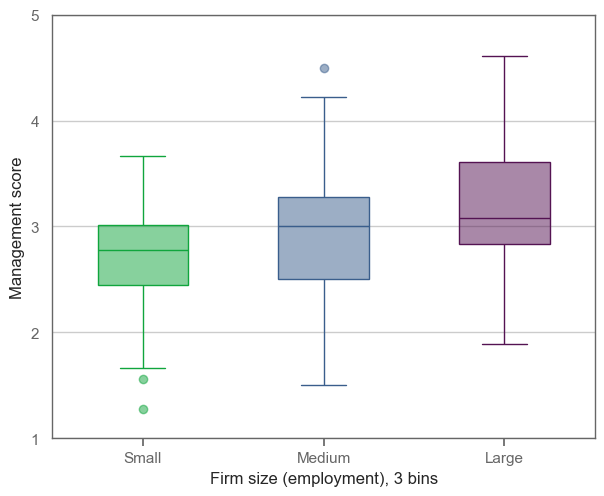

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(
    data=df, x="emp3bins", y="management", width=0.5, ax=ax, flierprops={"marker": "o"}
)

box_line_col = [da.color[1], da.color[0], da.color[2]]
for i, box_col in enumerate(box_line_col):
    mybox = ax.patches[i]
    mybox.set_facecolor(mpl.colors.to_rgba(box_col, 0.5))
    mybox.set_edgecolor(box_col)
    for j in range(i * 6, i * 6 + 6):
        line = ax.lines[j]
        line.set_color(box_col)
        line.set_mfc(mpl.colors.to_rgba(box_col, 0.5))
        line.set_mec(mpl.colors.to_rgba(box_col, 0.5))

plt.ylabel("Management score", size=12)
plt.xlabel("Firm size (employment), 3 bins", size=12)
plt.yticks(da.seq(1, 5, 1))
plt.show()

Violin plot

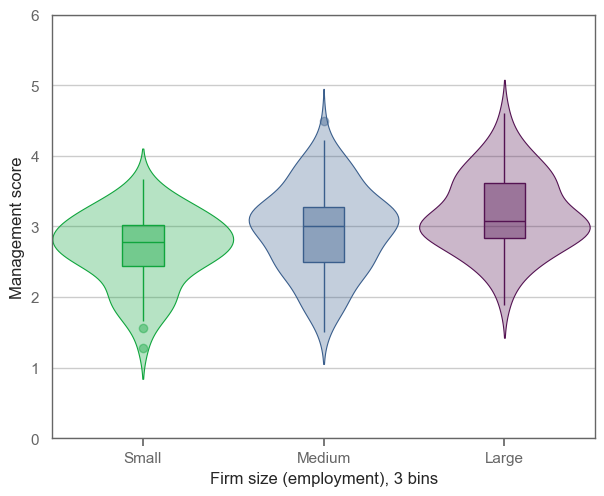

In [ ]:
fig, ax = plt.subplots()
sns.violinplot(
    data=df,
    x="emp3bins",
    y="management",
    ax=ax,
    inner_kws={"marker": "o"},
    width=1,
    linewidth=0.8,
    inner=None,
)

violin_line_col = [da.color[1], da.color[0], da.color[2]]
for i, violin_col in enumerate(violin_line_col):
    mybox = ax.collections[i]
    mybox.set_facecolor(mpl.colors.to_rgba(violin_col, 0.3))
    mybox.set_edgecolor(violin_col)

sns.boxplot(
    data=df,
    x="emp3bins",
    y="management",
    ax=ax,
    width=0.23,
    showcaps=False,
    flierprops={"marker": "o"},
)

box_line_col = [da.color[1], da.color[0], da.color[2]]
for i, box_col in enumerate(box_line_col):
    mybox = ax.patches[i]
    mybox.set_facecolor(mpl.colors.to_rgba(box_col, 0.4))
    mybox.set_edgecolor(box_col)
    for j in range(i * 4, i * 4 + 4):
        line = ax.lines[j]
        line.set_color(box_col)
        line.set_mfc(mpl.colors.to_rgba(box_col, 0.4))
        line.set_mec(mpl.colors.to_rgba(box_col, 0.4))

plt.ylabel("Management score", size=12)
plt.xlabel("Firm size (employment), 3 bins", size=12)
plt.yticks(da.seq(0, 6, 1))
plt.show()

In [ ]:
# Correlation
df["management"].corr(df["emp_firm"])

0.30199539572479067

In [ ]:
# by industry
df.loc[df["sic"] <= 21, "industry_broad"] = "food_drinks_tobacco"
df.loc[
    ((df["sic"] >= 22) & (df["sic"] <= 23)) | (df["sic"] == 31), "industry_broad"
] = "textile_apparel_leather_etc"
df.loc[(df["sic"] >= 24) & (df["sic"] <= 27), "industry_broad"] = "wood_furniture_paper"
df.loc[(df["sic"] >= 28) & (df["sic"] <= 30), "industry_broad"] = "chemicals_etc"
df.loc[(df["sic"] >= 32) & (df["sic"] < 35), "industry_broad"] = "materials_metals"
df.loc[(df["sic"] >= 35) & (df["sic"] < 37), "industry_broad"] = "electronics"
df.loc[df["sic"] == 37, "industry_broad"] = "auto"
df.loc[df["sic"] >= 38, "industry_broad"] = "other"

In [ ]:
df["industry_broad"].value_counts()


industry_broad
chemicals_etc                  69
materials_metals               50
textile_apparel_leather_etc    38
wood_furniture_paper           37
electronics                    36
food_drinks_tobacco            34
auto                           26
other                          10
Name: count, dtype: int64

In [ ]:
# Correlation
df.groupby("industry_broad")[["management", "emp_firm"]].corr().iloc[0::2, -1]


industry_broad                         
auto                         management    0.502322
chemicals_etc                management    0.053380
electronics                  management    0.282000
food_drinks_tobacco          management    0.052144
materials_metals             management    0.320921
other                        management    0.628398
textile_apparel_leather_etc  management    0.360877
wood_furniture_paper         management    0.294981
Name: emp_firm, dtype: float64

In [ ]:
(
    df.loc[df["industry_broad"].notna(), ["management", "industry_broad"]]
    .groupby("industry_broad")
    .agg(
        Min=("management", "min"),
        Max=("management", "max"),
        SD=("management", np.std),
        Median=("management", "median"),
        n=("management", "size"),
    )
    .round(3)
)

,Min,Max,SD,Median,n
industry_broad,,,,,
auto,2.278,4.278,0.553,3.194,26
chemicals_etc,1.278,4.111,0.550,3.000,69
electronics,1.500,4.500,0.693,3.111,36
food_drinks_tobacco,1.889,4.222,0.526,2.833,34
materials_metals,1.556,4.278,0.565,2.861,50
other,1.778,4.611,0.844,3.556,10
textile_apparel_leather_etc,1.778,4.000,0.567,2.778,38
wood_furniture_paper,1.722,3.556,0.556,2.833,37


In [ ]:
(
    df.loc[df["industry_broad"].notna(), ["emp_firm", "industry_broad"]]
    .groupby("industry_broad")
    .agg(
        Min=("emp_firm", "min"),
        Max=("emp_firm", "max"),
        SD=("emp_firm", np.std),
        Median=("emp_firm", "median"),
        n=("emp_firm", "size"),
    )
    .round(3)
)

,Min,Max,SD,Median,n
industry_broad,,,,,
auto,130.0,5000.0,1625.104,500.0,26
chemicals_etc,116.0,2000.0,465.981,356.0,69
electronics,115.0,5000.0,1126.787,295.0,36
food_drinks_tobacco,120.0,2400.0,665.626,471.0,34
materials_metals,100.0,5000.0,1151.437,335.0,50
other,200.0,2900.0,867.247,350.0,10
textile_apparel_leather_etc,110.0,4000.0,899.413,350.0,38
wood_furniture_paper,100.0,3500.0,855.610,300.0,37


In [ ]:
# Correlation
cor = (
    df.groupby("industry_broad")[["management", "emp_firm"]]
    .corr()
    .iloc[0::2, -1]
    .reset_index()
    .drop(["level_1"], axis=1)
    .set_index("industry_broad")
    .rename({"emp_firm": "correlation"}, axis=1)
)
cor.round(3)

,correlation
industry_broad,
auto,0.502
chemicals_etc,0.053
electronics,0.282
food_drinks_tobacco,0.052
materials_metals,0.321
other,0.628
textile_apparel_leather_etc,0.361
wood_furniture_paper,0.295


In [ ]:
table41 = (
    df.filter(["emp_firm", "industry_broad", "management"])
    .groupby("industry_broad")
    .agg(Mean=("management", "mean"), Obs=("management", "size"))
)
table41["Corr"] = cor["correlation"]

In [ ]:
table41.index = [
    "Auto",
    "Chemicals",
    "Machinery, equipment, electronics",
    "Food, drinks, tobacco",
    "Materials, metals",
    "Textile, apparel, leather",
    "Wood, furniture, paper",
    "Other",
]
table41.round(3)


,Mean,Obs,Corr
Auto,3.254,26,0.502
Chemicals,2.969,69,0.053
"Machinery, equipment, electronics",3.145,36,0.282
"Food, drinks, tobacco",2.871,34,0.052
"Materials, metals",2.849,50,0.321
"Textile, apparel, leather",3.289,10,0.628
"Wood, furniture, paper",2.769,38,0.361
Other,2.722,37,0.295


In [ ]:
last_row = (
    table41.groupby(lambda _: True)
    .agg(Mean=("Mean", "mean"), Obs=("Obs", "sum"), Corr=("Corr", "mean"))
    .reset_index(drop=True)
)
last_row.index = ["All"]
table41 = pd.concat([table41, last_row])

In [ ]:
table41 = table41.filter(["Corr", "Mean", "Obs"]).reset_index()
table41.columns = [
    "Industry",
    "Management - employment correlation",
    "Management score",
    "Observations",
]

In [ ]:
table41.round(2)


,Industry,Management - employment correlation,Management score,Observations
0,Auto,0.50,3.25,26
1,Chemicals,0.05,2.97,69
2,"Machinery, equipment, electronics",0.28,3.15,36
3,"Food, drinks, tobacco",0.05,2.87,34
4,"Materials, metals",0.32,2.85,50
5,"Textile, apparel, leather",0.63,3.29,10
6,"Wood, furniture, paper",0.36,2.77,38
7,Other,0.29,2.72,37
8,All,0.31,2.98,300
